# How did I contribute as a responsible citizen in a pendamic like Covid 19, being fully vaccinated ? Should I take a booster too?
If you too have such questions in your mind, if you are among those not vaccinated yet or fully vaccinated or waiting for a booster, from whichever country or state you belong to, here is a comparative analysis for you. Here the data visualizations demand your attention to see the effect of vaccination in general. How rate of infection and death rate has been varied before and after vaccinations with new covid variants show up, at Missouri, New York, compared to United States in general and why boosters are important too.  

The datasets I have taken are from https://covid.cdc.gov/ 
The target audience are general public and health professionals

 


In [600]:
library(tree)
library(ggplot2)
library(tidyr)
library(dplyr)
library(lubridate)

#Uploading datasets


df_miz_death<-read.csv(file='death_miz.csv') 
df_ny_death<-read.csv(file='death_ny.csv')
df_ala_death<-read.csv(file='death_al.csv')

df_miz_vac<-read.csv(file='vac_miz.csv')
df_ny_vac<-read.csv(file='vac_ny.csv')
df_alb_vac<-read.csv(file='vac_ala.csv')

head(df_miz_death)
head(df_ny_death)
head(df_ala_death)


Geography,Date,Weekly.Deaths,Weekly.Case.Rate.per.100k
<fct>,<fct>,<int>,<dbl>
Missouri,Nov 2 2022,50,110.67
Missouri,Oct 26 2022,56,90.01
Missouri,Oct 19 2022,28,59.63
Missouri,Oct 12 2022,81,77.79
Missouri,Oct 5 2022,60,99.90
Missouri,Sep 28 2022,31,115.60


Geography,Date,Weekly.Deaths,Weekly.Case.Rate.per.100k,Weekly.Deaths.1,Weekly.Case.Rate.per.100k.1
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
New York,Nov 2 2022,118,128.93,17,188.49
New York,Oct 26 2022,104,128.47,91,173.72
New York,Oct 19 2022,104,142.06,122,171.74
New York,Oct 12 2022,97,148.07,91,149.87
New York,Oct 5 2022,91,157.90,89,164.80
New York,Sep 28 2022,62,169.82,75,174.84


Geography,Date,Weekly.Deaths,Weekly.Case.Rate.per.100k
<fct>,<fct>,<int>,<dbl>
Alabama,Nov 9 2022,50,123.23
Alabama,Nov 2 2022,25,60.82
Alabama,Oct 26 2022,28,52.33
Alabama,Oct 19 2022,32,61.49
Alabama,Oct 12 2022,51,73.20
Alabama,Oct 5 2022,27,86.29


# Data Carpentry

In [601]:
#looking for duplicates

duplicated_miz_death <- df_miz_death %>% 
  mutate(weekly_death = duplicated(Date)) %>% 
  filter(weekly_death)

duplicated_miz_death

duplicated_ny_death <- df_ny_death %>% 
  mutate(weekly_death = duplicated(Date)) %>% 
  filter(weekly_death)

duplicated_ny_death

duplicated_ala_death <- df_ala_death %>% 
  mutate(weekly_death = duplicated(Date)) %>% 
  filter(weekly_death)

duplicated_ala_death

Geography,Date,Weekly.Deaths,Weekly.Case.Rate.per.100k,weekly_death
<fct>,<fct>,<int>,<dbl>,<lgl>


Geography,Date,Weekly.Deaths,Weekly.Case.Rate.per.100k,Weekly.Deaths.1,Weekly.Case.Rate.per.100k.1,weekly_death
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<lgl>


Geography,Date,Weekly.Deaths,Weekly.Case.Rate.per.100k,weekly_death
<fct>,<fct>,<int>,<dbl>,<lgl>


In [602]:
str(df_miz_death)
str(df_ny_death)
str(df_ala_death)

'data.frame':	145 obs. of  4 variables:
 $ Geography                : Factor w/ 1 level "Missouri": 1 1 1 1 1 1 1 1 1 1 ...
 $ Date                     : Factor w/ 145 levels "Apr  1 2020",..: 111 129 126 123 120 143 140 137 134 26 ...
 $ Weekly.Deaths            : int  50 56 28 81 60 31 36 39 65 90 ...
 $ Weekly.Case.Rate.per.100k: num  110.7 90 59.6 77.8 99.9 ...
'data.frame':	145 obs. of  6 variables:
 $ Geography                  : Factor w/ 1 level "New York": 1 1 1 1 1 1 1 1 1 1 ...
 $ Date                       : Factor w/ 145 levels "Apr  1 2020",..: 111 129 126 123 120 143 140 137 134 26 ...
 $ Weekly.Deaths              : int  118 104 104 97 91 62 68 74 72 59 ...
 $ Weekly.Case.Rate.per.100k  : num  129 128 142 148 158 ...
 $ Weekly.Deaths.1            : int  17 91 122 91 89 75 77 107 78 95 ...
 $ Weekly.Case.Rate.per.100k.1: num  188 174 172 150 165 ...
'data.frame':	146 obs. of  4 variables:
 $ Geography                : Factor w/ 1 level "Alabama": 1 1 1 1 1 1 1 1 1 1 ...


In [603]:
#removing the extra columns from ny dataframe, here the data is given separately for NY state excluding NY city and NY city, 
#so we will add that and remove the currently available cells.

df_ny_death$Weekly.Deaths <- df_ny_death$Weekly.Deaths + df_ny_death$Weekly.Deaths.1
head(df_ny_death)

df_ny_death$Weekly.Case.Rate.per.100k <- df_ny_death$Weekly.Case.Rate.per.100k + df_ny_death$Weekly.Case.Rate.per.100k.1
head(df_ny_death)



Geography,Date,Weekly.Deaths,Weekly.Case.Rate.per.100k,Weekly.Deaths.1,Weekly.Case.Rate.per.100k.1
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
New York,Nov 2 2022,135,128.93,17,188.49
New York,Oct 26 2022,195,128.47,91,173.72
New York,Oct 19 2022,226,142.06,122,171.74
New York,Oct 12 2022,188,148.07,91,149.87
New York,Oct 5 2022,180,157.90,89,164.80
New York,Sep 28 2022,137,169.82,75,174.84


Geography,Date,Weekly.Deaths,Weekly.Case.Rate.per.100k,Weekly.Deaths.1,Weekly.Case.Rate.per.100k.1
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
New York,Nov 2 2022,135,317.42,17,188.49
New York,Oct 26 2022,195,302.19,91,173.72
New York,Oct 19 2022,226,313.80,122,171.74
New York,Oct 12 2022,188,297.94,91,149.87
New York,Oct 5 2022,180,322.70,89,164.80
New York,Sep 28 2022,137,344.66,75,174.84


In [604]:



df_ny = select(df_ny_death, -Weekly.Deaths.1)



In [605]:
df_ny1 = select(df_ny, -Weekly.Case.Rate.per.100k.1)

In [606]:
df_ny1

Geography,Date,Weekly.Deaths,Weekly.Case.Rate.per.100k
<fct>,<fct>,<int>,<dbl>
New York,Nov 2 2022,135,317.42
New York,Oct 26 2022,195,302.19
New York,Oct 19 2022,226,313.80
New York,Oct 12 2022,188,297.94
New York,Oct 5 2022,180,322.70
New York,Sep 28 2022,137,344.66
New York,Sep 21 2022,145,336.63
New York,Sep 14 2022,181,292.95
New York,Sep 7 2022,150,284.75


In [607]:

#stacking the dataframes
df<- rbind(df_miz_death, df_ny1, df_ala_death)

In [608]:
#Changing the format of date values
df$Date<- mdy(df$Date)
head(df)

Geography,Date,Weekly.Deaths,Weekly.Case.Rate.per.100k
<fct>,<date>,<int>,<dbl>
Missouri,2022-11-02,50,110.67
Missouri,2022-10-26,56,90.01
Missouri,2022-10-19,28,59.63
Missouri,2022-10-12,81,77.79
Missouri,2022-10-05,60,99.90
Missouri,2022-09-28,31,115.60


In [609]:
library(tidyverse)

#group data by month and year
df<- df %>% 
    group_by(month = lubridate::floor_date(Date, 'month'),Geography) %>%
    summarize(MonthlyDeaths= sum(Weekly.Deaths), Monthly_case_rate_per_100k= sum(Weekly.Case.Rate.per.100k))
df

month,Geography,MonthlyDeaths,Monthly_case_rate_per_100k
<date>,<fct>,<int>,<dbl>
2020-01-01,Missouri,0,0.00
2020-01-01,New York,0,0.00
2020-01-01,Alabama,0,0.00
2020-02-01,Missouri,0,0.00
2020-02-01,New York,0,0.00
2020-02-01,Alabama,0,0.00
2020-03-01,Missouri,9,7.31
2020-03-01,New York,627,330.15
2020-03-01,Alabama,1,9.62


In [652]:
df_2021<- subset(df, month >= '2021-01-01' & month < '2021-12-01')

In [653]:
df_2022<- subset(df, month >= '2021-12-01' & month < '2022-11-01')


png 
  2

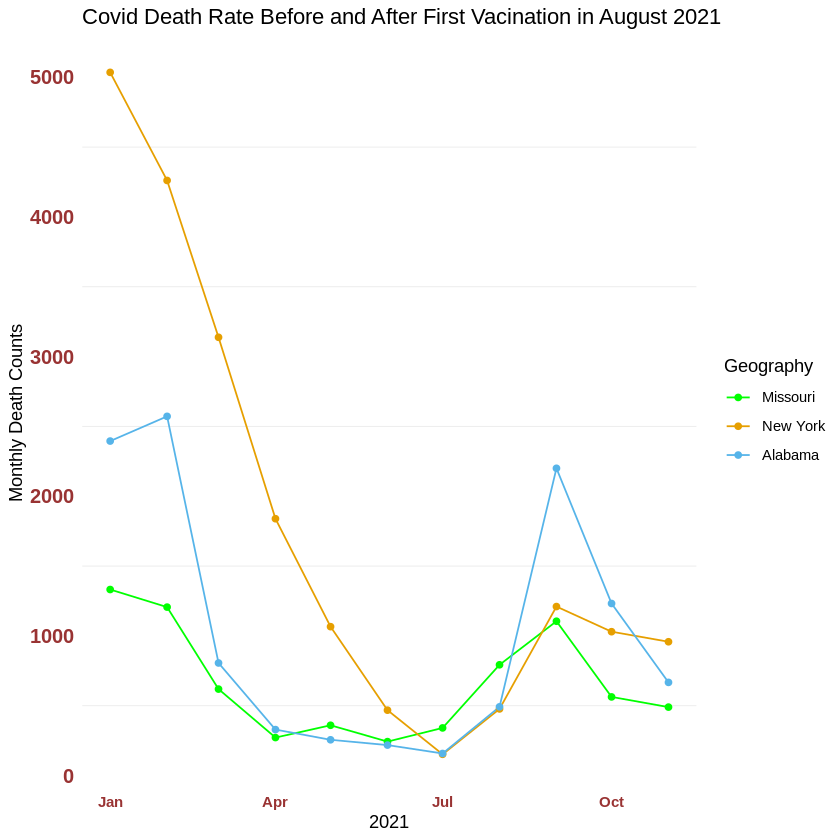

In [655]:
ggplot(data=df_2021, aes(x=month, y=MonthlyDeaths, group=Geography)) +
  geom_line(aes(color=Geography))+
  geom_point(aes(color=Geography))+scale_color_manual(values=c("green", "#E69F00", "#56B4E9")) + theme_bw()+theme( strip.background  = element_blank(),
                    panel.grid.major =  element_blank(),
                    panel.border = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid.minor.x=element_blank(),
                    panel.grid.major.x=element_blank() )+ ggtitle("Covid Death Rate Before and After First Vacination in August 2021") +
  xlab("2021") + ylab("Monthly Death Counts")+ theme(axis.text.x = element_text(face="bold", color="#993333", 
                           size=9),
          axis.text.y = element_text(face="bold", color="#993333", 
                           size=12))

png(filename="myplot.png", width = 20, height = 12)


dev.off()

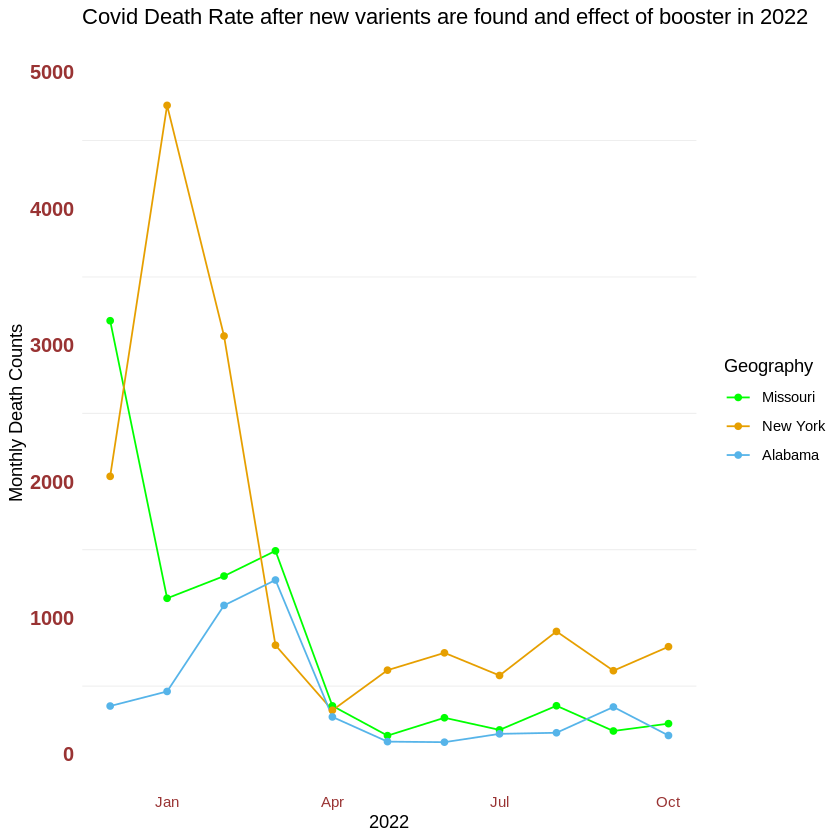

In [656]:
ggplot(data=df_2022, aes(x=month, y=MonthlyDeaths, group=Geography)) +
  geom_line(aes(color=Geography))+ ylim(0, 5000)+
  geom_point(aes(color=Geography))+scale_color_manual(values=c("green", "#E69F00", "#56B4E9")) + theme_bw()+theme( strip.background  = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.border = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid.minor.x=element_blank(),
                    panel.grid.major.x=element_blank() )+ ggtitle("Covid Death Rate after new varients are found and effect of booster in 2022") +
  xlab("2022") + ylab("Monthly Death Counts")+ theme(axis.text.x = element_text( color="#993333", 
                           size=9),
          axis.text.y = element_text(face="bold", color="#993333", 
                           size=12))

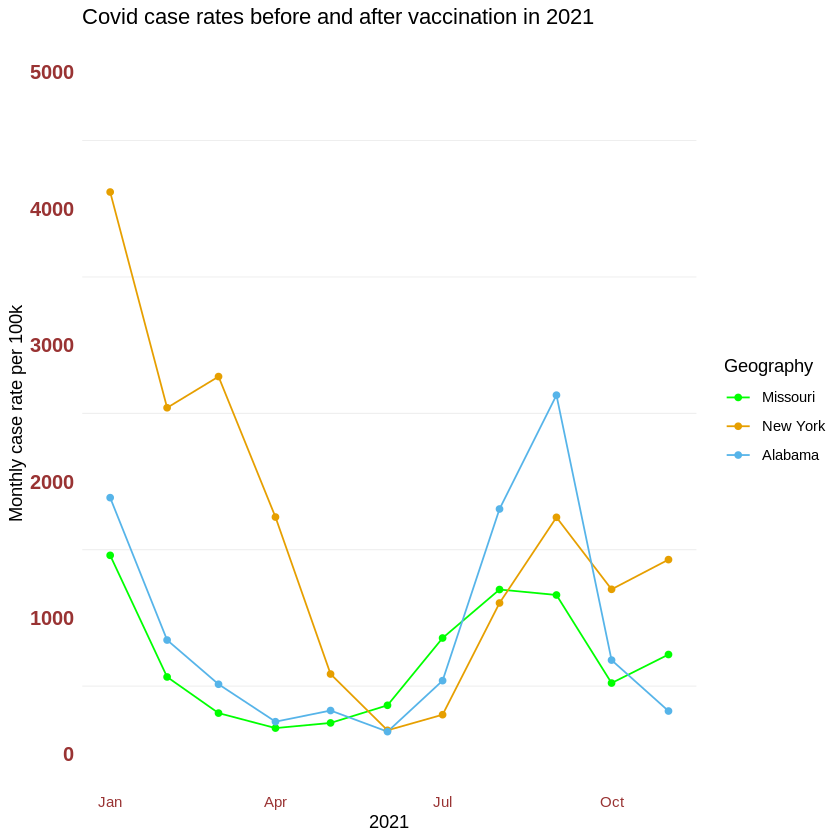

In [660]:
ggplot(data=df_2021, aes(x=month, y=Monthly_case_rate_per_100k, group=Geography)) +
  geom_line(aes(color=Geography))+ ylim(0, 5000)+
  geom_point(aes(color=Geography))+scale_color_manual(values=c("green", "#E69F00", "#56B4E9")) + theme_bw()+theme( strip.background  = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.border = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid.minor.x=element_blank(),
                    panel.grid.major.x=element_blank() )+ ggtitle("Covid case rates before and after vaccination in 2021") +
  xlab("2021") + ylab("Monthly case rate per 100k")+ theme(axis.text.x = element_text( color="#993333", 
                           size=9),
          axis.text.y = element_text(face="bold", color="#993333", 
                           size=12))

Warning message:
“Removed 2 rows containing missing values (geom_path).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

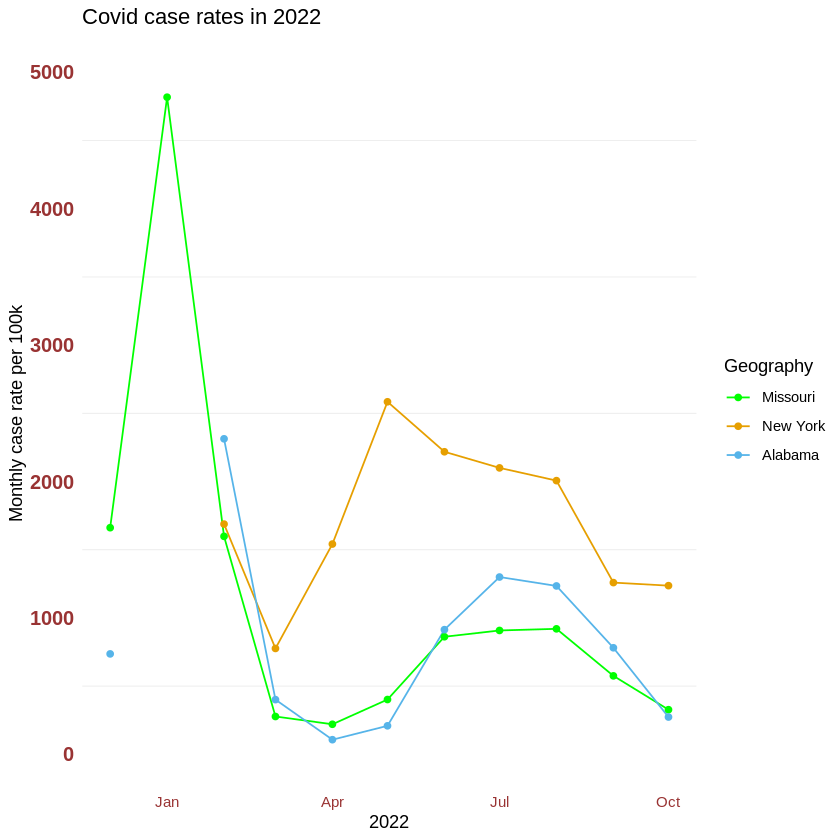

In [663]:
ggplot(data=df_2022, aes(x=month, y=Monthly_case_rate_per_100k, group=Geography)) +
  geom_line(aes(color=Geography))+ ylim(0, 5000)+
  geom_point(aes(color=Geography))+scale_color_manual(values=c("green", "#E69F00", "#56B4E9")) + theme_bw()+theme( strip.background  = element_blank(),
                    panel.grid.major = element_blank(),
                    panel.border = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid.minor.x=element_blank(),
                    panel.grid.major.x=element_blank() )+ ggtitle("Covid case rates in 2022") +
  xlab("2022") + ylab("Monthly case rate per 100k")+ theme(axis.text.x = element_text( color="#993333", 
                           size=9),
          axis.text.y = element_text(face="bold", color="#993333", 
                           size=12))

In [706]:
df_miz_1 = tail(df_miz_vac)
df_ny_1 = tail(df_ny_vac)
df_alb_1 = tail(df_alb_vac)

df_n = select(df_ny_1,-Location)
df_n$name <- "New York"

df_m = select(df_miz_1, -Long.Name)
df_m

df_alb = select(df_alb_1,-Long.Name)

df_1<- rbind(df_n, df_m, df_alb)

df_1

,Date,Percent.of.Total.Pop.with.at.least.One.Dose,Percent.of.People.with.Complete.Primary.Series,Percent.of.People.with.a.Completed.Primary.Series.who.have.a.First.Booster.Dose
,<fct>,<dbl>,<dbl>,<dbl>
690,2022-11-03,68.6,58.3,46.2
691,2022-11-04,68.6,58.3,46.3
692,2022-11-05,68.6,58.3,46.3
693,2022-11-06,68.6,58.3,46.3
694,2022-11-07,68.6,58.3,46.3
695,2022-11-08,68.6,58.3,46.3


ERROR: Error in rbind(deparse.level, ...): numbers of columns of arguments do not match
